In [41]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Navegación Robot

- 0: ADELANTE
- 1: GIRAR A LA IZQUIERDA
- 2: GIRAR A LA DERECHA

## Local instalation (option 1)

Install the following Python packages to run this notebook

`pip install pip -U`

`pip install tensorflow jupyter`

## Google Colab (option 2)

[Google Colab](https://colab.research.google.com/) is a research project created to help disseminate machine learning education and research. It's a `Jupyter notebook` environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [42]:
!pip install -q keras sklearn

!pip install shap

## Import packages

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import class_weight

from sklearn.model_selection import KFold, StratifiedKFold

from keras.preprocessing.image import ImageDataGenerator

from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings('ignore')
import shap

from skimage import data, img_as_float, exposure

## Define global constants

Lets start with a few epochs to test learning network parameters

In [44]:
batch_size = 32
nb_classes = 3
epochs = 25


# Scaling input image to theses dimensions
#img_rows, img_cols = 32, 32 #24, 24

## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

Building the model:

**(Mejor hasta el momento)** -> Funciones de activación ReLU

**Modelo inicial:**

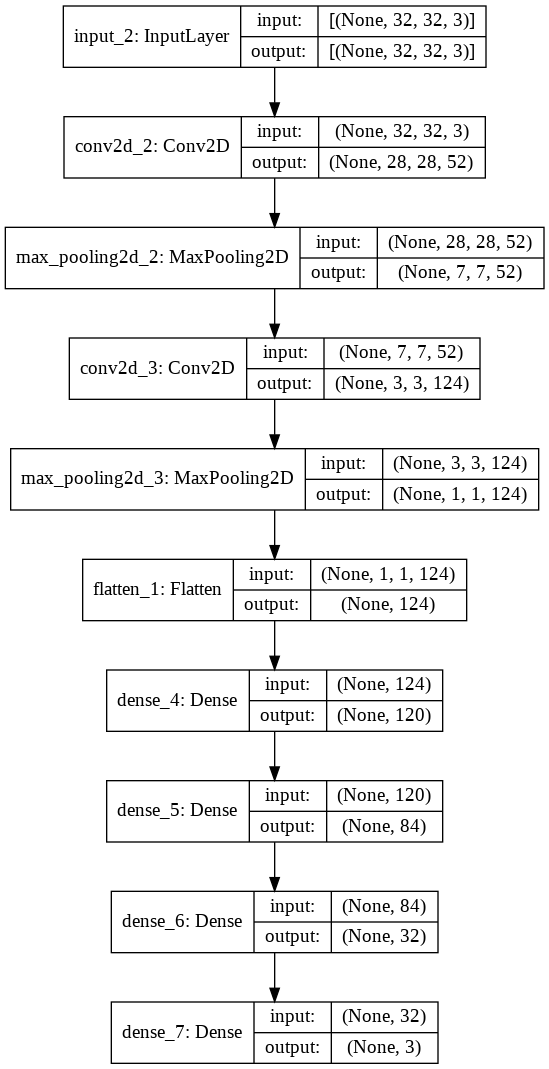

In [45]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

#Funciones de optimización probadas: sigmoid, tanh, relu, selu
#Mejor hasta el momento: relu
activation = "relu"

def cnn_model():
    #
    # Neural Network Structure
    #
    
    input_shape = (32, 32, 3)

    inputs = keras.Input(shape=input_shape)
    
    x = layers.Conv2D(52, (5, 5), activation=activation)(inputs)
    x = layers.MaxPooling2D(pool_size=(4, 4))(x)

    x = layers.Conv2D(124, (5, 5), activation=activation)(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Flatten()(x)

    x = layers.Dense(120, activation=activation)(x)
    x = layers.Dense(84, activation=activation)(x)
    x = layers.Dense(32, activation=activation)(x)
    

    outputs = layers.Dense(nb_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

'''
"""
Parameters
"""
epocas=20
longitud, altura = 640, 480
batch_size = 32
pasos = 1000
validation_steps = 300
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 3
lr = 0.0004

model = Sequential()
model.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=tamano_pool))

model.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
model.add(MaxPooling2D(pool_size=tamano_pool))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(clases, activation='softmax'))
'''

model = cnn_model()
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

## Start to run the program

In [46]:
# Cada instancia de ImageDataGenerator efectuará unas modificaciones. Es decir,
# utilizamos el datagen que tenga las modificaciones que deseamos.
# Las aplicamos con el método flow

datagen = ImageDataGenerator(
  rescale=1./255
)

In [47]:
# No es necesario, pero prefiero llamar así al conjunto de entrenamiento,
inputs = datagen.flow_from_directory(
    "/content/drive/MyDrive/images_var2",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode="categorical" 
)


# Define the K-fold Cross Validator
# 10 Cross Validation
# num_folds se define al comienzo junto a los otros parámetros, debe ser 10 para
# para haber implementado 10-CV
# Utilizamos StratifiedKFold ya que de esta manera las divisiones del conjunto
# se hacen atendiendo a la proporción de clases del conjunto completo.
# Se realizan de manera que puedan representar el escenario real (el total)
#skfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

#print(f'Inputs {inputs.shape}')
#print(f'Targets {targets.shape}')

Found 781 images belonging to 3 classes.


In [48]:

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_loss', patience=8)
early_stopping = EarlyStopping(monitor='accuracy', patience=8)



#model.fit(datagen.flow(inputs_train, targets_train_nn, batch_size=24), verbose=2, epochs=10)
model.fit(inputs, epochs=12, batch_size=32 ,verbose=2, callbacks=early_stopping)

  
print(model.summary())

Epoch 1/12
25/25 - 6s - loss: 1.0749 - accuracy: 0.4097
Epoch 2/12
25/25 - 5s - loss: 0.9309 - accuracy: 0.5647
Epoch 3/12
25/25 - 5s - loss: 0.7881 - accuracy: 0.6863
Epoch 4/12
25/25 - 5s - loss: 0.6992 - accuracy: 0.7234
Epoch 5/12
25/25 - 5s - loss: 0.6244 - accuracy: 0.7529
Epoch 6/12
25/25 - 5s - loss: 0.5969 - accuracy: 0.7542
Epoch 7/12
25/25 - 5s - loss: 0.5263 - accuracy: 0.7964
Epoch 8/12
25/25 - 5s - loss: 0.5226 - accuracy: 0.7913
Epoch 9/12
25/25 - 5s - loss: 0.4440 - accuracy: 0.8143
Epoch 10/12
25/25 - 5s - loss: 0.3988 - accuracy: 0.8374
Epoch 11/12
25/25 - 5s - loss: 0.2937 - accuracy: 0.8886
Epoch 12/12
25/25 - 5s - loss: 0.3180 - accuracy: 0.8745
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 

#Guardar red

In [52]:
model.save('./modelo/modelo.h5')
model.save_weights('./modelo/pesos.h5')

In [49]:
def predict(file):
  x = load_img(file, target_size=(32, 32))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: Adelante")
  elif answer == 1:
    print("pred: Derecha")
  elif answer == 2:
    print("pred: Izquierda")
  return answer

print("Adelante:")
for i in range(30):
  if(i<10): 
    print(predict("/content/drive/MyDrive/images_var2/adelante/left000"+str(i)+".jpg"))
  else:
    print(predict("/content/drive/MyDrive/images_var2/adelante/left00"+str(i)+".jpg"))

print()
print("Izquierda:")
for i in range(30):
  if(i<10):
    print(predict("/content/drive/MyDrive/images_var2/izquierda/left000"+str(i)+".jpg"))
  else:
    print(predict("/content/drive/MyDrive/images_var2/izquierda/left00"+str(i)+".jpg"))

print()
print("Derecha:")
for i in range(30):
  if(i<10):
    print(predict("/content/drive/MyDrive/images_var2/derecha/left000"+str(i)+".jpg"))
  else:
    print(predict("/content/drive/MyDrive/images_var2/derecha/left00"+str(i)+".jpg"))

Adelante:
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Derecha
1
pred: Derecha
1
pred: Derecha
1
pred: Derecha
1
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0
pred: Adelante
0

Izquierda:
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
pred: Izquierda
2
